In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# importing data set

In [2]:
df=pd.read_csv('Restaurant_Reviews.tsv', delimiter = "\t",quoting=3)
print(df)

                                                Review  Liked
0                             Wow... Loved this place.      1
1                                   Crust is not good.      0
2            Not tasty and the texture was just nasty.      0
3    Stopped by during the late May bank holiday of...      1
4    The selection on the menu was great and so wer...      1
..                                                 ...    ...
995  I think food should have flavor and texture an...      0
996                           Appetite instantly gone.      0
997  Overall I was not impressed and would not go b...      0
998  The whole experience was underwhelming, and I ...      0
999  Then, as if I hadn't wasted enough of my life ...      0

[1000 rows x 2 columns]


# extracting x & y

In [3]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

# refining data

In [4]:
#refining data
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = [] # list will contain all the refined reviews

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Gupta's\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
for i in range(0,1000):
    review = df['Review'][i] # Collecting the reviews one by one
    review = re.sub('[^a-zA-z]', ' ', review) # replacing the punctuations with space
    review = review.lower() # converting all the characters into lower case
    review = review.split() # splitting word of the statement i.e converting a statement into list of words
    ps = PorterStemmer() # creating the object of the porter stemmer class
    all_stopwords = stopwords.words('english') # collecting the english language stop words
    # removing 'not' from the stopwords
    all_stopwords.remove('not')
    review =[ps.stem(word) for word in review if not word in set(all_stopwords)]
    # coverting the list of words back to statement
    # for this we will use the join function
    review = ' '.join(review)
    corpus.append(review) # collecting the refined reviews

In [6]:
print(corpus)

['wow love place', 'crust not good', 'not tasti textur nasti', 'stop late may bank holiday rick steve recommend love', 'select menu great price', 'get angri want damn pho', 'honeslti tast fresh', 'potato like rubber could tell made ahead time kept warmer', 'fri great', 'great touch', 'servic prompt', 'would not go back', 'cashier care ever say still end wayyy overpr', 'tri cape cod ravoli chicken cranberri mmmm', 'disgust pretti sure human hair', 'shock sign indic cash', 'highli recommend', 'waitress littl slow servic', 'place not worth time let alon vega', 'not like', 'burritto blah', 'food amaz', 'servic also cute', 'could care less interior beauti', 'perform', 'right red velvet cake ohhh stuff good', 'never brought salad ask', 'hole wall great mexican street taco friendli staff', 'took hour get food tabl restaur food luke warm sever run around like total overwhelm', 'worst salmon sashimi', 'also combo like burger fri beer decent deal', 'like final blow', 'found place accid could not

# creating bag of words

In [7]:
#creating bag of words
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=2500)
# using the max_feature parameter of countVectorizer to limit the number of columns in x
x = cv.fit_transform(corpus).toarray()
y = df.iloc[:,-1].values
len(x[0])

1566

# Feature Scaling

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
sc = StandardScaler()
x = sc.fit_transform(x)
scaler = RobustScaler()
x = scaler.fit_transform(x)

# spliting x & y into training set & test set

In [9]:
#spliting x & y into training set & test set
from sklearn.model_selection import train_test_split 
x_tr,x_te,y_tr,y_te = train_test_split(x,y,train_size = 0.8, random_state =2) #rand=179,124 trainsize=0.761,0.83

# creating and training knn model

In [10]:
#creating and training knn model
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=3,metric='minkowski',leaf_size=1, p=6) 
classifier.fit(x,y)


KNeighborsClassifier(leaf_size=1, n_neighbors=3, p=6)

# predicting output


In [11]:
y_pred = classifier.predict(x_te)


In [12]:
from sklearn import metrics
print("Accuracy:",format(metrics.accuracy_score(y_te, y_pred)*100,'.2f'))
print("Precision:",format(metrics.precision_score(y_te, y_pred)*100,'.2f'))
print("Recall:",format(metrics.recall_score(y_te, y_pred)*100,'.2f'))


Accuracy: 92.50
Precision: 90.53
Recall: 93.48


# plotting confusion matrix & accuracy score


[[99  9]
 [ 6 86]]
Accuracy: 92.50


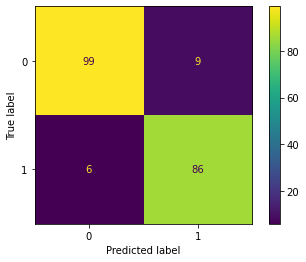

In [13]:
## plotting confusion matrix & accuracy score
from sklearn.metrics import plot_confusion_matrix, accuracy_score, confusion_matrix
from sklearn import metrics

plot_confusion_matrix(estimator=classifier,X=x_te,y_true=y_te)
print(confusion_matrix(y_te,y_pred))
print("Accuracy:",format(metrics.accuracy_score(y_te, y_pred)*100,'.2f'))

Percentage for default

1    50.0
0    50.0
Name: Liked, dtype: float64


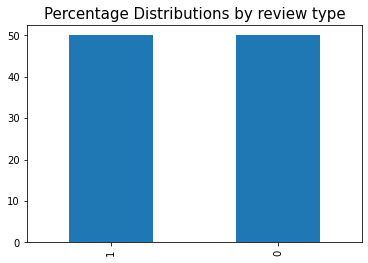

In [14]:
%matplotlib inline
print('Percentage for default\n') 
print(round (df.Liked.value_counts(normalize=True)*100,2)) 
round(df. Liked.value_counts(normalize=True)*100,2).plot(kind='bar') 
plt.title('Percentage Distributions by review type',fontsize=15) 
plt.show()

In [15]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.25, random_state = 79) #rand=79 train_size=0.819 test=0.25

from sklearn.decomposition import PCA
pca = PCA(n_components= 5)

from sklearn.svm import SVC
classi= SVC(kernel='linear',random_state=0)
classi.fit(x_train,y_train)
#predicting the output for SVM with pca
y_pred_svm  = classi.predict(x_test)

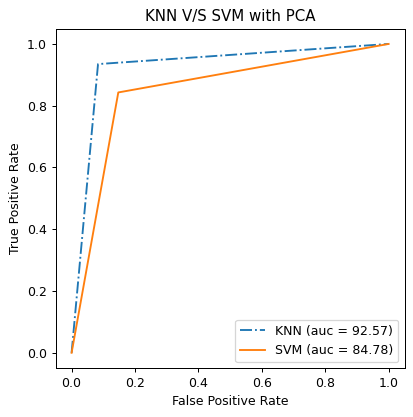

In [16]:
from sklearn.metrics import roc_curve, auc


knn_fpr, knn_tpr, threshold = roc_curve(y_te, y_pred)
auc_knn = auc(knn_fpr, knn_tpr)*100

svm_fpr1, svm_tpr1, threshold = roc_curve(y_test, y_pred_svm)
auc_svm1 = auc(svm_fpr1, svm_tpr1)*100

plt.figure(figsize=(5,5), dpi=90)
plt.plot(knn_fpr, knn_tpr, linestyle='-.', label='KNN (auc = %0.2f)' % auc_knn)
plt.plot(svm_fpr1, svm_tpr1, linestyle='-', label='SVM (auc = %0.2f)' % auc_svm1)

plt.title('KNN V/S SVM with PCA')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()
plt.show()

# Detecting best k value

Text(0, 0.5, 'Testing Accuracy')

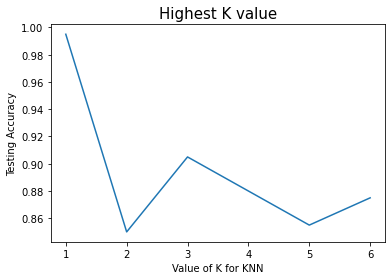

In [17]:
# try K=1 through K=25 and record testing accuracy
k_range = range(1, 7)

# We can create Python dictionary using [] or dict()
scores = []

# We use a loop through the range 1 to 26
# We append the scores in the dictionary
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x, y)
    y_pred = knn.predict(x_te)
    scores.append(metrics.accuracy_score(y_te, y_pred))

#print(scores)

# import Matplotlib (scientific plotting library)
import matplotlib.pyplot as plt

# allow plots to appear within the notebook
%matplotlib inline

# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot(k_range, scores)
plt.title('Highest K value',fontsize=15)
plt.xlabel('Value of K for KNN',fontsize=10)
plt.ylabel('Testing Accuracy',fontsize=10)